<a href="https://colab.research.google.com/github/adasanvin12345/Machine_Learning/blob/master/Digit_Recogniser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

----Importing the Libraries

In [0]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import GridSearchCV

---------Importing the DATASET

In [0]:
df_train = pd.read_csv('train.csv')

In [0]:
X_train = df_train.iloc[:, 1:].values

In [0]:
y_train = df_train.iloc[:, 0].values

In [0]:
print(X_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


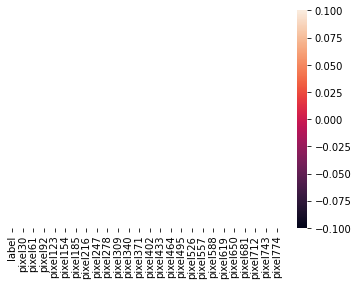

In [0]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=True)


In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [0]:
df_train.shape

(42000, 785)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)


In [0]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


---------Building ANN Model

In [0]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [0]:
def built_classifier(optimizer="adam"):
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(output_dim = 50, init = 'uniform',activation='relu',input_dim = 784))

    # Adding the second hidden layer
    classifier.add(Dense(output_dim = 25, init = 'uniform',activation='relu'))

    # Adding the third hidden layer
    classifier.add(Dense(output_dim = 50, init = 'uniform',activation='relu'))
    # Adding the output layer
    classifier.add(Dense(output_dim = 10, init = 'uniform',activation="softmax"))
    classifier.compile(optimizer=optimizer,loss="categorical_crossentropy", metrics=['accuracy'])

    return classifier

In [0]:
# batch_size=[500,1000]
# epochs=[50,100,150]
# # Define the grid of hyperparameters to search
# hyperparameter_grid = {
#     'batch_size':batch_size,
#     'epochs':epochs,
#     }


In [0]:
classifier=KerasClassifier(build_fn=built_classifier)
model_history=classifier.fit(X_train, y_train,validation_split=0.20, batch_size = 10, nb_epoch = 10)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=784, units=50, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=25, kernel_initializer="uniform")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10, kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/keras/wrappers/scikit_learn.py:151: UserWarning: The `

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 8s 238us/step - loss: 0.3858 - accuracy: 0.8773 - val_loss: 0.2288 - val_accuracy: 0.9363
Epoch 2/10
33600/33600 [==============================] - 9s 262us/step - loss: 0.1676 - accuracy: 0.9501 - val_loss: 0.1748 - val_accuracy: 0.9496
Epoch 3/10
33600/33600 [==============================] - 9s 259us/step - loss: 0.1182 - accuracy: 0.9646 - val_loss: 0.1620 - val_accuracy: 0.9536
Epoch 4/10
33600/33600 [==============================] - 7s 220us/step - loss: 0.0939 - accuracy: 0.9711 - val_loss: 0.1646 - val_accuracy: 0.9560
Epoch 5/10
33600/33600 [==============================] - 8s 231us/step - loss: 0.0758 - accuracy: 0.9756 - val_loss: 0.1625 - val_accuracy: 0.9577
Epoch 6/10
33600/33600 [==============================] - 8s 247us/step - loss: 0.0644 - accuracy: 0.9798 - val_loss: 0.1966 - val_accuracy: 0.9577
Epoch 7/10
33600/33600 [==============================] - 7s 21

In [0]:
# random_cv = GridSearchCV(estimator=classifier,
#             # param_grid=hyperparameter_grid,
#             cv=10,
#             scoring = 'accuracy',n_jobs = -1
#             )

In [0]:
# random_cv.fit(X_train,y_train)


In [0]:
# random_cv.best_estimator_

In [0]:
df_test=pd.read_csv("train.csv")

In [0]:
df_test.shape

(42000, 785)

In [0]:
X_test=df_test.iloc[:28000,1:]


In [0]:
X_test.shape

(28000, 784)

In [0]:
X_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
ann_pred=classifier.predict(X_test)

In [0]:
pred=pd.DataFrame(ann_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['ImageId'],pred],axis=1)
datasets.columns=['ImageId','Label']
datasets.to_csv('sample_submission.csv',index=False)

In [0]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'ImageId':df_test.iloc[:28000,0],'Label':ann_pred})

#Visualize the first 5 rows
submission.head()

,ImageId,Label
0,1,1
1,0,0
2,1,1
3,4,4
4,0,0


In [0]:
filename = 'Digit_Prediction.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Digit_Prediction.csv
